In [9]:
# importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from chardet import detect

In [10]:
# After noticing some strange characters in excel, I checked for the character encoding
def get_encoding_type(file):
    with open(file, 'rb') as f:
        rawdata = f.read()
    return detect(rawdata)['encoding']

In [11]:
file = '/content/merged.csv'

In [12]:
print(get_encoding_type(file))

MacRoman


In [13]:
# reading into a dataframe with the encoding attribute set to the type obtained
df = pd.read_csv(file, encoding='macroman')

In [14]:
df.head()

,review_title,review_text,stay_date,room_tips,review_date,author_overall_rating,hotel_name
0,Much loved present,As you know Bros T recently stayed with you. M...,01/11/2021,NaN,01/11/2021,5,African Garden Lounge
1,Hell on Earth!!,We stayed TWICE 2015-2016 for at total of 70 d...,01/07/2016,There are no good rooms . They are all dirty a...,01/06/2017,1,African Garden Lounge
2,"Absolutely loved this place, homely and quiet....",Quiet area picturesque. Lovely gardens and tr...,01/10/2016,Executive Suite,01/01/2017,5,African Garden Lounge
3,"Quiet, secure, quaint","The African Garden Lodge is in a secure, quiet...",01/12/2016,NaN,01/12/2016,3,African Garden Lounge
4,"Lovely Hotel, Great Price, Close to everything...",The hotel is tucked away in a quiet corner of ...,01/03/2015,NaN,01/11/2015,4,African Garden Lounge


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10066 entries, 0 to 10065
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   review_title           10066 non-null  object
 1   review_text            10066 non-null  object
 2   stay_date              10055 non-null  object
 3   room_tips              176 non-null    object
 4   review_date            10065 non-null  object
 5   author_overall_rating  10066 non-null  int64 
 6   hotel_name             10064 non-null  object
dtypes: int64(1), object(6)
memory usage: 550.6+ KB


## Data Dictionary

1. `review_title` - A short text summing up the author's experience.
2. `review_text` - Details of the author's experience.
3. `stay_date` - The date the author booked the hotel.
4. `room_tips` - Tips given for future users.
5. `review_date` - The date the hotel was reviewed.
7. `hotel_name` - The name of the establishment.

## Changing Datatypes

In [16]:
# converting visit date column to datetime
df['stay_date'] = pd.to_datetime(df['stay_date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10066 entries, 0 to 10065
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   review_title           10066 non-null  object        
 1   review_text            10066 non-null  object        
 2   stay_date              10055 non-null  datetime64[ns]
 3   room_tips              176 non-null    object        
 4   review_date            10065 non-null  object        
 5   author_overall_rating  10066 non-null  int64         
 6   hotel_name             10064 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 550.6+ KB


## Removing unwanted characters
- Changing the character encoding of the `review_title` and `review_text` columns to UTF-8. This removes the strange characters noticed while skimming through the character in Excel.

- Removing 'More' from the `review_text` column. 'More' is mostly present in texts that were too long, so they were cut short on the TripAdvisor website. Unfortunately, it was not avoidable when scraping.

In [19]:
df['review_text'] = df['review_text'].str.encode('utf-8').str.decode('MacRoman')

In [20]:
df['review_title'] = df['review_title'].str.encode('utf-8').str.decode('MacRoman')

In [21]:
df['review_text'] = df['review_text'].replace('More', ' ')

In [22]:
df['review_text'] = df['review_text'].replace('...', ' ')

In [23]:
# saving the clean text to a new file
df.to_csv('clean_lagos_hotels.csv', index=True)

In [24]:
file = '/content/clean_lagos_hotels.csv'

In [25]:
print(get_encoding_type(file))

utf-8


## Data Exploration through Visualisation

- Exploring the distribution of the overall ratings.
- The most frequent used phases used in the review titles.

In [26]:
df.describe()

,author_overall_rating
count,10066.000000
mean,4.059110
std,1.129553
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


Th minimum author rating is 1.0 and the average is 4.0

In [27]:
!pip install wordcloud

In [29]:
# separating the reviews into two dataframes; one for overall ratings below 3.0 and one for 3.0 and above
low_df = df.loc[df['author_overall_rating'] < 3.0]
high_df = df.loc[df['author_overall_rating'] > 3.0]

In [30]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

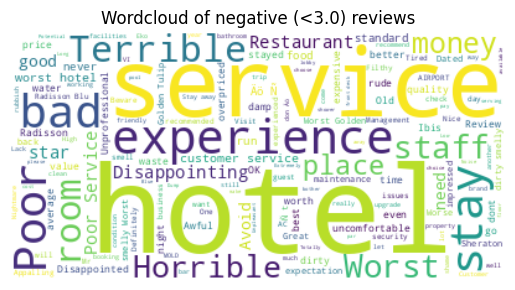

In [31]:
# wordcloud for negative ratings
text = ' '.join(title for title in low_df['review_title'])

stopwords = set(STOPWORDS)
stopwords.update(["lagos", "breakfast", "dinner", "lunch", "nigeria"])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of negative (<3.0) reviews')
plt.axis("off")
plt.show()

"Terrible", "Bad", "Poor", "Horrible", "Worst", "Overpriced" and "Rude" are some of the common words used for the negative ratings

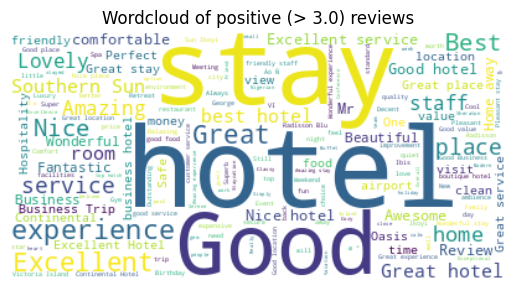

In [32]:
# wordcloud for positive ratings
text = ' '.join(title for title in high_df['review_title'])

stopwords = set(STOPWORDS)
stopwords.update(["lagos", "breakfast", "dinner", "lunch", "nigeria"])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of positive (> 3.0) reviews')
plt.axis("off")
plt.show()

It seems most of our visitors with positive ratings used "Good", "Great", "Friendly", "Comfortable", "Amazing", "Best" and "Excellent" in their review titles!